In [1]:
# common stats analysis stack
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import itertools
import pingouin as pg

#scikit learn
from sklearn.linear_model import LogisticRegression

# formulat interface to statsmodels (standard linear models)
import statsmodels.api as sm
import statsmodels.formula.api as smf
# BAyesian Model-building Interface (BAMBI)
import bambi as bmb
import arviz as az

# for printing pretty tables and plots
from tabulate import tabulate
from  matplotlib.ticker import FuncFormatter, MaxNLocator

# some stuff for making notebooks look nice
from IPython.core.display import HTML, Markdown, display

# seed RNG
np.random.seed(0)

# hate these things
import warnings
warnings.filterwarnings("ignore")

# display all columns of dataframes
pd.set_option('display.max_columns', None)

# display x rows of dataframes
pd.set_option('display.max_rows', 30) # set to None to show all rows

In [2]:
# import cleaned data

exp_df = pd.read_csv("cleandata/exp-05-05-2022.csv")
qdf = pd.read_csv("cleandata/q-05-05-2022.csv")

In [3]:
# formatting for consistent and beautiful coloring. for default/no hues, use color="b" (black)
# mypalette = ["#66c2a5","#8da0cb","#e78ac3","#fc8d62","#a6d854","#ffd92f"]
# mypalette = ["#1b9e77","#d95f02","#e7298a","#7570b3","#66a61e","#e6ab02"]
mypalette=["#264653","#2a9d8f","#e9d8a6","#ee9b00","#bb3e03","#9b2226"]
sns.set_palette(mypalette)
pal = sns.color_palette(mypalette)

# where axis is like ax.xaxis or ax.yaxis
def integerize_ticks(axis):
    axis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

def plot_performance_over_rule(ax):
    ax.set_ylabel("Percent correct")
    ax.set_ylim([0.0,1])
    ax.axhline(0.5, ls='--',color="lightgrey",zorder=0)
    ax.set_xlabel("Categorization Rule Type")
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x+1))) # here we add one since rule is 0 indexed
    
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    

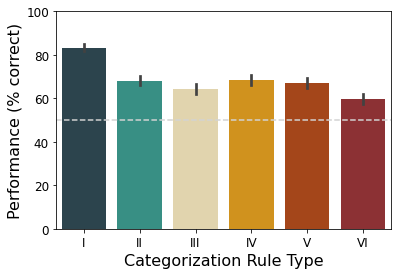

In [4]:
# fig, axes = plt.subplots(1,4)

ruletypes = {0:"I",1:"II",2:"III",3:"IV",4:"V",5:"VI"}
ruletypeslist = ["I","II","III","IV","V","VI"]

df = exp_df.loc[(exp_df["expNum"]==0)] #&(exp_df["phase"]!="test")]

# for i in range(4):
ax = sns.barplot(x="ruleInt", y="hitormiss", data=100*df,hue="ruleInt", dodge=False,ci=95)
ax.set_ylabel("Performance (% correct)")
ax.set_ylim([0,100])
ax.axhline(50, ls='--',color="lightgrey",zorder=1)
ax.set_xlabel("Categorization Rule Type")
ax.set_xticklabels(ruletypeslist)
# ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: str(x))) # here we add one since rule is 0 indexed

ax.legend().remove()

ax.set_ylabel("Performance (% correct)")

# plt.show()
plt.savefig('exp1performance.png', bbox_inches='tight', dpi=300)

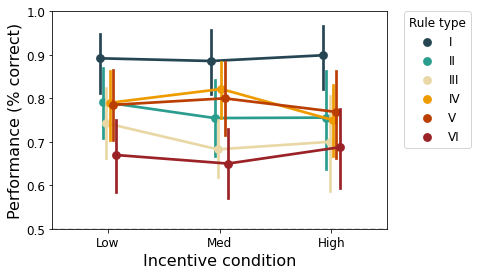

In [5]:
df = exp_df.loc[(exp_df["expNum"]==0)] # & (exp_df["phase"]=="bonus")]

df = df.ffill().loc[df["phase"]=="bonus"]
df["ruleInt"]=df["ruleInt"].astype(int)
ax = sns.pointplot(x="incentive", y=df["testscore"]/8, data=df,join=True, hue="ruleInt", dodge=True,ci=95,palette=pal)
# ax.set_title("Exp. 1 Test Phase",fontsize=20)
# plt.legend(ruletypeslist)
ax.legend(title="Rule type",bbox_to_anchor=(1.25, 1),borderaxespad=0)

for t, l in zip(ax.get_legend().texts, ruletypeslist):
    t.set_text(l)

plt.ylim([0.5,1.0])
ax.axhline(0.5, ls='--',color="lightgrey",zorder=0)

# Format pretty
ax.set_xticklabels(["Low","Med","High"])
ax.set_ylabel("Performance (% correct)")
ax.set_xlabel("Incentive condition")


# plt.show()
plt.savefig('exp1incentive.png', bbox_inches='tight', dpi=300)

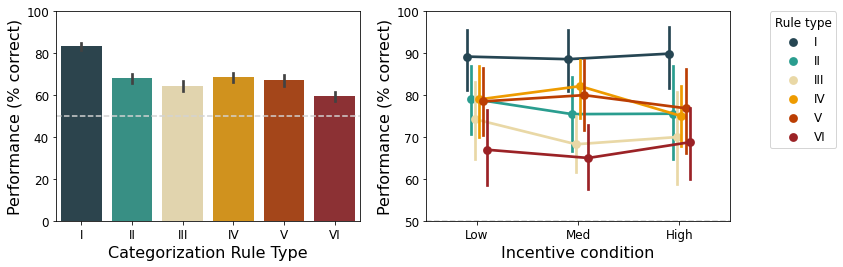

In [6]:
# fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(6,9))
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,4))

ax0=axes[0]
sns.barplot(x="ruleInt", y="hitormiss",ax=axes[0], data=100*exp_df.loc[(exp_df["expNum"]==0)],hue="ruleInt", dodge=False,ci=95)
ax0.set_ylabel("Performance (% correct)")
ax0.set_ylim([0,100])
ax0.axhline(50, ls='--',color="lightgrey",zorder=1)
ax0.set_xlabel("Categorization Rule Type")
ax0.set_xticklabels(["I","II","III","IV","V","VI"])
# ax0.xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x+1))) # here we add one since rule is 0 indexed

ax0.legend().remove()

ax0.set_ylabel("Performance (% correct)")


ax1=axes[1]
df = exp_df.loc[(exp_df["expNum"]==0)] # & (exp_df["phase"]=="bonus")]
df = df.ffill().loc[df["phase"]=="bonus"]
df["ruleInt"]=df["ruleInt"].astype(int)
sns.pointplot(x="incentive", y=100 *df["testscore"]/8,ax=axes[1], data=df,join=True, hue="ruleInt", dodge=0.2,ci=95,palette=pal)
# ax.set_title("Exp. 1 Test Phase",fontsize=20)
ax1.legend(title="Rule type",bbox_to_anchor=(1.35, 1),borderaxespad=0)

for t, l in zip(ax1.get_legend().texts, ruletypeslist):
    t.set_text(l)
plt.ylim([50,100])
ax1.axhline(50, ls='--',color="lightgrey",zorder=0)

# Format pretty
ax1.set_xticklabels(["Low","Med","High"])
ax1.set_ylabel("Performance (% correct)")
ax1.set_xlabel("Incentive condition")


plt.rc('font', size=16)          # controls default text sizes
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('figure', titlesize=24)  # fontsize of the figure title

plt.tight_layout()

# plt.show()
plt.savefig('exp1results.png', bbox_inches='tight', dpi=300)

Exp. 1, N=418
n per condition for rules 2 and 4:
Exp. 2, N=97
n per condition for rules 2 and 4:
Exp. 3, N=93
n per condition for rules 2 and 4:
Exp. 4, N=31
n per condition for rules 2 and 4:


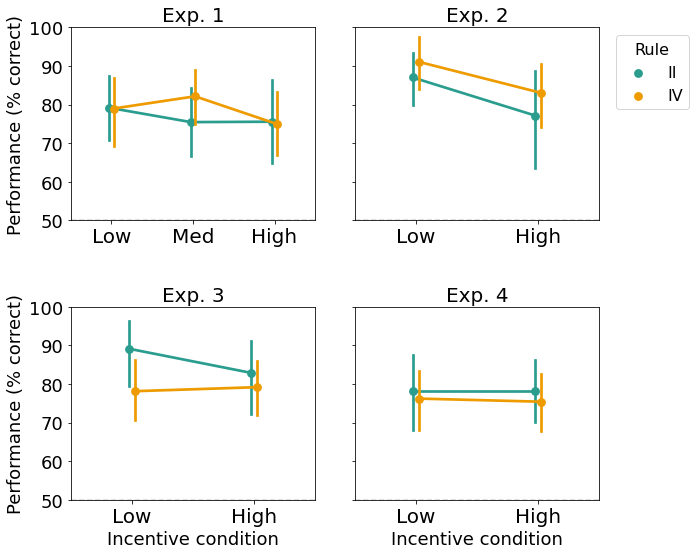

In [7]:
# TEST performance by incentive
# compare two rules only
rulea = 2;
ruleb = 4;

fig, axes = plt.subplots(nrows=2,ncols=2,sharey=True,figsize=(10,8))

for i in range(4):
    if i==3:
        x="ticketvalue"
    else:
        x="incentive"
    ax=axes[int(np.floor(i/2)),int(i%2)]
    df = exp_df.loc[(exp_df["expNum"]==i)] # & (exp_df["phase"]=="bonus")]
    df = df.ffill().loc[df["phase"]=="bonus"]
    df["ruleInt"]=df["ruleInt"].astype(int)
    sns.pointplot(x=x, y=100 * df["testscore"]/8, ax=ax, data=df.loc[(df["ruleInt"]==rulea) | (df["ruleInt"]==ruleb)], join=True, hue="ruleInt", dodge=True,ci=95,palette=[pal[rulea-1],pal[ruleb-1]])

    ax.legend().remove()
    ax.set_title("Exp. " + str(i+1),fontsize=20)
    print("Exp. "+str(i+1)+", N="+str(len(df["subjid"].unique())))
#     plt.legend(title="Rule",bbox_to_anchor=(1.3, 2),borderaxespad=0)
    if i==1:
        ax.legend(title="Rule",bbox_to_anchor=(1.4, 1))
        for t, l in zip(ax.get_legend().texts, ["II","IV"]):
            t.set_text(l)
    else:
        ax.legend().remove()
    
#     plt.ylim([0.5,1.0])
#     ax.axhline(0.5, ls='--',color="lightgrey",zorder=0)
    
    plt.ylim([50,100])
    ax.axhline(50, ls='--',color="lightgrey",zorder=0)
    
    # Format pretty
    if i==0:
        ax.set_xticklabels(["Low","Med","High"])
        print("n per condition for rules 2 and 4:")
        
    else:
        ax.set_xticklabels(["Low","High"])
        print("n per condition for rules 2 and 4:")
        
    if i in [0,2]:
        ax.set_ylabel("Performance (% correct)")
    else:
        ax.set_ylabel(" ")
        
    if i in [2,3]:
        ax.set_xlabel("Incentive condition")
    else:
        ax.set_xlabel(" ")

plt.tight_layout()
# plt.show()
plt.savefig('exp1thru4_perf.png', bbox_inches='tight', dpi=300)

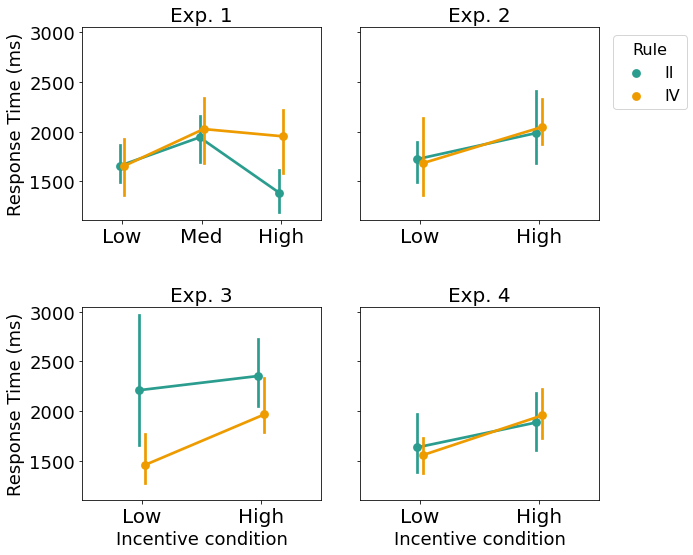

In [8]:
# TEST performance by incentive
# compare two rules only
rulea = 2;
ruleb = 4;

fig, axes = plt.subplots(nrows=2,ncols=2,sharey=True,figsize=(10,8))

for i in range(4):
    if i==3:
        x="ticketvalue"
    else:
        x="incentive"
    ax=axes[int(np.floor(i/2)),int(i%2)]
    df = exp_df.loc[(exp_df["expNum"]==i)] # & (exp_df["phase"]=="bonus")]
    df = df.ffill().loc[df["phase"]=="test"]
    df["ruleInt"]=df["ruleInt"].astype(int)
    sns.pointplot(x=x, y="rt", ax=ax, estimator=np.median, data=df.loc[(df["ruleInt"]==rulea) | (df["ruleInt"]==ruleb)], join=True, hue="ruleInt", dodge=True,ci=95,palette=[pal[rulea-1],pal[ruleb-1]])

#     ax.legend().remove()
    ax.set_title("Exp. " + str(i+1),fontsize=20)
#     plt.legend(title="Rule",bbox_to_anchor=(1.3, 2),borderaxespad=0)
    if i==1:
        ax.legend(title="Rule",bbox_to_anchor=(1.4, 1))
        for t, l in zip(ax.get_legend().texts, ["II","IV"]):
            t.set_text(l)
    else:
        ax.legend().remove()
        
#     for tick in ax.get_yticklabels():
#         tick.set_visible(True)
#     ax.set_yticklabels(list(axes[0,0].get_yticklabels()))

    # Format pretty
    if i==0:
        ax.set_xticklabels(["Low","Med","High"])
    else:
        ax.set_xticklabels(["Low","High"])
        
    if i in [0,2]:
        ax.set_ylabel("Response Time (ms)")
    else:
        ax.set_ylabel(" ")
        
    if i in [2,3]:
        ax.set_xlabel("Incentive condition")
    else:
        ax.set_xlabel(" ")

        
plt.tight_layout()
# plt.show()
plt.savefig('exp1thru4_rts.png', bbox_inches='tight', dpi=300)

In [9]:
display(df)

,Unnamed: 0,Unnamed: 0.1,phase,subjid,incentive,rule,dimorder,dimvals,condition,counterbalance,block,trial,nrepeats,theorystim,actualstim,correct,resp,hitormiss,rt,testscore,timestop,lasttwodigits,bonusprob,bonus,ruleInt,ruleStr,expNum,iid,answervalue,game,ticketvalue,ticketcolor,blocktrial,bonustodate,totalbonustodate,ntrials,points,allcards,moreA,scoretodate,score,bonusvalue,win
18277,18881,73,test,0,NaN,1.0,0.0,7.0,5.0,0.0,2.0,33.0,4.0,7.0,0.0,0.0,0.0,True,3769.0,NaN,NaN,NaN,NaN,NaN,2,II,3,626,NaN,0.0,0.02,blue,1.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18278,18882,74,test,0,NaN,1.0,0.0,7.0,5.0,0.0,2.0,34.0,4.0,3.0,2.0,0.0,0.0,True,2462.0,NaN,NaN,NaN,NaN,NaN,2,II,3,626,NaN,0.0,0.02,blue,1.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18279,18883,75,test,0,NaN,1.0,0.0,7.0,5.0,0.0,2.0,35.0,4.0,4.0,5.0,0.0,0.0,True,1176.0,NaN,NaN,NaN,NaN,NaN,2,II,3,626,NaN,0.0,0.02,blue,1.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18280,18884,76,test,0,NaN,1.0,0.0,7.0,5.0,0.0,2.0,36.0,4.0,2.0,6.0,1.0,1.0,True,1137.0,NaN,NaN,NaN,NaN,NaN,2,II,3,626,NaN,0.0,0.02,blue,1.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18281,18885,77,test,0,NaN,1.0,0.0,7.0,5.0,0.0,2.0,37.0,4.0,1.0,3.0,1.0,1.0,True,642.0,NaN,NaN,NaN,NaN,NaN,2,II,3,626,NaN,0.0,0.02,blue,1.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23323,24750,9888,test,35,NaN,1.0,3.0,6.0,7.0,0.0,8.0,156.0,4.0,3.0,5.0,0.0,0.0,True,4412.0,3.0,NaN,NaN,NaN,0.0,2,II,3,661,NaN,3.0,0.02,blue,1.0,3.69,3.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23324,24751,9889,test,35,NaN,1.0,3.0,6.0,7.0,0.0,8.0,157.0,4.0,4.0,2.0,0.0,0.0,True,11860.0,3.0,NaN,NaN,NaN,0.0,2,II,3,661,NaN,3.0,0.02,blue,1.0,3.69,3.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23325,24752,9890,test,35,NaN,1.0,3.0,6.0,7.0,0.0,8.0,158.0,4.0,1.0,7.0,1.0,1.0,True,3562.0,3.0,NaN,NaN,NaN,0.0,2,II,3,661,NaN,3.0,0.02,blue,1.0,3.69,3.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23326,24753,9891,test,35,NaN,1.0,3.0,6.0,7.0,0.0,8.0,159.0,4.0,6.0,0.0,1.0,1.0,True,1004.0,3.0,NaN,NaN,NaN,0.0,2,II,3,661,NaN,3.0,0.02,blue,1.0,3.69,3.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


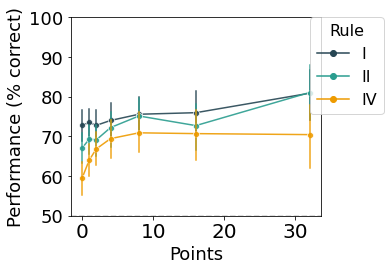

In [10]:
# exp 5 performance 

df = exp_df.loc[(exp_df["expNum"]==4)] # & (exp_df["phase"]=="bonus")]

df["ruleInt"]=df["ruleInt"].astype(int)

def get_moreA_CORRECTED(row):
    moreA_CORRECTED = row["moreA"]
    if row["rule"]==1:
        if row["dimvals"] in [1,2,5,6]:
            moreA_CORRECTED = not row["moreA"]
        
    return moreA_CORRECTED

df = exp_df.loc[(exp_df["expNum"]==4) & (exp_df["phase"]=="task")] 

# "moreA_CORRECTED" = True if allcards has more A cards than B cards
df["moreA_CORRECTED"] = df.apply(lambda row: get_moreA_CORRECTED(row), axis=1)
# "correct_CORRECTED" = 0 if moreA==True
df["correct_CORRECTED"] = df.apply(lambda row: 0 if row["moreA_CORRECTED"] else 1, axis=1)
# "hitormiss_CORRECTED" = True if resp == correct_CORRECTED
df["hitormiss_CORRECTED"] = df.apply(lambda row: row["resp"]==row["correct_CORRECTED"], axis=1)
df = df[["subjid","phase","ruleInt","trial","points","hitormiss_CORRECTED","rt"]]
df["hit"] = df["hitormiss_CORRECTED"].astype(int)

ax = sns.lineplot(x="points", y=100*df["hitormiss_CORRECTED"], data=df, hue="ruleInt",alpha=0.9, ci=95,palette=[pal[0],pal[1],pal[3]], style="ruleInt", markers=["o", "o", "o"], dashes=False,err_style="bars")
# ax = sns.pointplot(x="points", y=100*df["hitormiss"], data=df, hue="ruleInt", ci=95,palette=[pal[0],pal[1],pal[3]], join=True, dodge=True)

# ax.set_title("Exp 5 Performance")
plt.legend(title="Rule",bbox_to_anchor=(1.25, 1),borderaxespad=0)
for t, l in zip(ax.get_legend().texts, ["I","II","IV"]):
    t.set_text(l)

plt.ylim([50,100])

ax.axhline(50, ls='--',color="lightgrey",zorder=0)

# Format pretty
# ax.set_xticklabels(["Low","High"])
ax.set_ylabel("Performance (% correct)")
ax.set_xlabel("Points")

plt.tight_layout()
# plt.show()
plt.savefig('exp5perf.png', bbox_inches='tight', dpi=300)


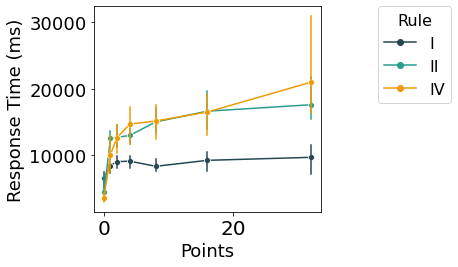

In [11]:
# exp 5 rt 

df = exp_df.loc[(exp_df["expNum"]==4)] # & (exp_df["phase"]=="bonus")]

df["ruleInt"]=df["ruleInt"].astype(int)

# df["rtMedians"] = df.groupby(["subjid","points"])["rt"].median() #"rt"
# y = df.groupby(["subjid","ruleInt","points"])["rt"].median()

ax = sns.lineplot(x="points", y="rt",estimator=np.median, data=df, hue="ruleInt", ci=95,palette=[pal[0],pal[1],pal[3]], style="ruleInt", markers=["o", "o", "o"], dashes=False,err_style="bars")
# ax = sns.lineplot(x="points", y="rt", data=df, hue="ruleInt", ci=95,palette=[pal[0],pal[1],pal[3]], style="ruleInt", markers=["o", "o", "o"], dashes=False,err_style="bars")
# ax = sns.pointplot(x="points", y="hitormiss", data=df, hue="ruleInt", ci=95,palette=[pal[0],pal[1],pal[3]], join=True, dodge=True)
# sns.pointplot(x="points", y="rt", estimator=np.mean, data=df, join=True, hue="ruleInt", dodge=True,ci=95,palette=[pal[0],pal[1],pal[3]])
# ax = sns.lineplot(x="points", y="rt",estimator=np.median, data=df, hue="ruleInt", ci=95,palette=[pal[0],pal[1],pal[3]], style="ruleInt", markers=["o", "o", "o"], dashes=False,err_style="bars")

# ax.set_title("Exp. 5 Response Time",fontsize=20)
plt.legend(title="Rule",bbox_to_anchor=(1.25, 1),borderaxespad=0)
for t, l in zip(ax.get_legend().texts, ["I","II","IV"]):
    t.set_text(l)
# plt.ylim([30,100])

# ax.axhline(50, ls='--',color="lightgrey",zorder=0)

# Format pretty
# ax.set_xticklabels(["Low","High"])
ax.set_ylabel("Response Time (ms)")
ax.set_xlabel("Points")

plt.tight_layout()
plt.show()
# plt.savefig('exp5rt.png', bbox_inches='tight', dpi=300)

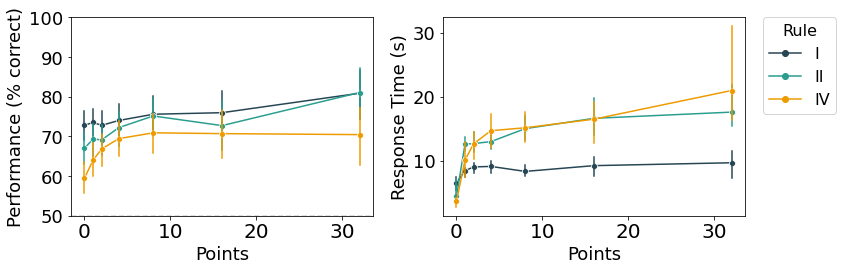

In [12]:
logscale=False

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,4))

df = exp_df.loc[(exp_df["expNum"]==4)] # & (exp_df["phase"]=="bonus")]

df["ruleInt"]=df["ruleInt"].astype(int)

# exp 5 performance 
ax0=axes[0]

df = exp_df.loc[(exp_df["expNum"]==4) & (exp_df["phase"]=="task")] 

# "moreA_CORRECTED" = True if allcards has more A cards than B cards
df["moreA_CORRECTED"] = df.apply(lambda row: get_moreA_CORRECTED(row), axis=1)
# "correct_CORRECTED" = 0 if moreA==True
df["correct_CORRECTED"] = df.apply(lambda row: 0 if row["moreA_CORRECTED"] else 1, axis=1)
# "hitormiss_CORRECTED" = True if resp == correct_CORRECTED
df["hitormiss_CORRECTED"] = df.apply(lambda row: row["resp"]==row["correct_CORRECTED"], axis=1)
df = df[["subjid","phase","ruleInt","trial","points","hitormiss_CORRECTED","rt"]]
df["hit"] = df["hitormiss_CORRECTED"].astype(int)


if logscale:
# ax = sns.lineplot(x="points", y=100*df["hitormiss"], data=df, hue="ruleInt", ci=95,palette=[pal[0],pal[1],pal[3]], style="ruleInt", markers=["o", "o", "o"], dashes=False,err_style="bars")
    sns.pointplot(x="points",  y=100*df["hitormiss_CORRECTED"], data=df,ax=ax0, hue="ruleInt", ci=95,palette=[pal[0],pal[1],pal[3]], join=True, dodge=True)
else:
    sns.lineplot(x="points", y=100*df["hitormiss_CORRECTED"], data=df,ax=ax0, hue="ruleInt", ci=95,palette=[pal[0],pal[1],pal[3]], style="ruleInt", markers=["o", "o", "o"], dashes=False,err_style="bars")

    
ax0.legend().remove()
ax0.set_ylim([50,100])
ax0.axhline(50, ls='--',color="lightgrey",zorder=0)

# Format pretty
# ax.set_xticklabels(["Low","High"])
ax0.set_ylabel("Performance (% correct)")
ax0.set_xlabel("Points")


# exp 5 rt 
ax1=axes[1]
if logscale:
    sns.pointplot(x="points", y=df["rt"]/1000, estimator=np.median, data=df, ax=ax1,join=True, hue="ruleInt", dodge=True,ci=95,palette=[pal[0],pal[1],pal[3]])
else:
    sns.lineplot(x="points", y=df["rt"]/1000,estimator=np.median, data=df,ax=ax1, hue="ruleInt", ci=95,palette=[pal[0],pal[1],pal[3]], style="ruleInt", markers=["o", "o", "o"], dashes=False,err_style="bars")

plt.legend(title="Rule",bbox_to_anchor=(1.3, 1),borderaxespad=0)
for t, l in zip(ax1.get_legend().texts, ["I","II","IV"]):
    t.set_text(l)

# Format pretty
ax1.set_ylabel("Response Time (s)")
ax1.set_xlabel("Points")

plt.tight_layout()
# plt.show()
plt.savefig('exp5results.png', bbox_inches='tight', dpi=300)

In [13]:
# Exp 6 

# logscale=False

# fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,4))

# df = exp_df.loc[(exp_df["expNum"]==5)] # & (exp_df["phase"]=="bonus")]

# df["ruleInt"]=df["ruleInt"].astype(int)

# # exp 5 performance 
# ax0=axes[0]

# adf = exp_df.loc[(exp_df["expNum"]==5) & (exp_df["phase"]=="bonus")] 
# adf["ruleInt"]=adf["ruleInt"].astype(int)
# display(adf.head())
# sns.pointplot(x="ticketcolor", y=100 * adf["testscore"]/8, data=adf, ax=ax0, hue="ruleInt", ci=95, palette=[pal[0],pal[1],pal[3]], join=True, dodge=True)

# ax0.legend().remove()
# ax0.set_ylim([50,100])
# ax0.axhline(50, ls='--',color="lightgrey",zorder=0)

# # Format pretty
# ax0.set_xticklabels(["Low","High"])
# ax0.set_ylabel("Performance (% correct)")
# ax0.set_xlabel("Incentive condition")


# # exp 5 rt 
# ax1=axes[1]
# sns.pointplot(x="ticketcolor", y=df["rt"]/1000, estimator=np.median, data=df, ax=ax1,join=True, hue="ruleInt", dodge=True,ci=95,palette=[pal[0],pal[1],pal[3]])
# # sns.lineplot(x="points", y=df["rt"]/1000,estimator=np.median, data=df,ax=ax1, hue="ruleInt", ci=95,palette=[pal[0],pal[1],pal[3]], style="ruleInt", markers=["o", "o", "o"], dashes=False,err_style="bars")

# plt.legend(title="Rule",bbox_to_anchor=(1.3, 1),borderaxespad=0)
# for t, l in zip(ax1.get_legend().texts, ["I","II","IV"]):
#     t.set_text(l)

# # Format pretty
# ax1.set_ylabel("Response Time (s)")
# ax1.set_xlabel("Incentive condition")
# ax1.set_xticklabels(["Low","High"])


# plt.tight_layout()
# # plt.show()
# plt.savefig('exp6results.png', bbox_inches='tight', dpi=300)

In [14]:
df = exp_df.loc[(exp_df["expNum"]==4) * (exp_df["phase"]=="task")] 
df = df[["subjid","phase","ruleInt","trial","points","hitormiss","rt"]]
df["hit"] = df["hitormiss"].astype(int)
display(df)

,subjid,phase,ruleInt,trial,points,hitormiss,rt,hit
23329,0,task,1.0,0.0,16.0,True,26054.0,1
23330,0,task,1.0,1.0,2.0,True,20040.0,1
23331,0,task,1.0,2.0,1.0,True,15873.0,1
23332,0,task,1.0,3.0,2.0,True,21300.0,1
23333,0,task,1.0,4.0,4.0,True,15639.0,1
...,...,...,...,...,...,...,...,...
31523,209,task,2.0,35.0,8.0,False,13084.0,0
31524,209,task,2.0,36.0,0.0,True,5232.0,1
31525,209,task,2.0,37.0,2.0,False,11377.0,0
31526,209,task,2.0,38.0,2.0,True,12059.0,1


In [15]:
new_df=pd.get_dummies(df["ruleInt"],drop_first=True)
# newnewdf = df.merge(new_df)
df[["ruleCondition2","ruleCondition4"]]=new_df
df

,subjid,phase,ruleInt,trial,points,hitormiss,rt,hit,ruleCondition2,ruleCondition4
23329,0,task,1.0,0.0,16.0,True,26054.0,1,0,0
23330,0,task,1.0,1.0,2.0,True,20040.0,1,0,0
23331,0,task,1.0,2.0,1.0,True,15873.0,1,0,0
23332,0,task,1.0,3.0,2.0,True,21300.0,1,0,0
23333,0,task,1.0,4.0,4.0,True,15639.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
31523,209,task,2.0,35.0,8.0,False,13084.0,0,1,0
31524,209,task,2.0,36.0,0.0,True,5232.0,1,1,0
31525,209,task,2.0,37.0,2.0,False,11377.0,0,1,0
31526,209,task,2.0,38.0,2.0,True,12059.0,1,1,0


In [16]:
# md = smf.mixedlm("hit ~ points + ruleCondition2 + ruleCondition4", df) #, groups=["ruleCondition2","ruleCondition4"], re_formula="~points")
# mdf = md.fit(method=["lbfgs"])
# print(mdf.summary())

In [18]:
model = bmb.Model(df)
results = model.fit('hit ~ points + ruleCondition2 + ruleCondition4', draws=1000, chains=4)

# model.backend.model
# model.plot_priors()

func_dict = {"Median": np.median,
            "MAD_SD":stats.median_abs_deviation,
             }
coefs = az.summary(results, stat_funcs=func_dict, extend=True)
coefs

TypeError: __init__() missing 1 required positional argument: 'data'

In [ ]:
# stats

# md = smf.mixedlm("hitormiss ~ points", df, groups=df["ruleInt"]) #, re_formula="~points")
# mdf = md.fit() #method=["lbfgs"])
# print(mdf.summary())

model = bmb.Model(df)
results = model.fit('hit ~ points + C(ruleInt)', draws=1000, chains=4)

# model.backend.model
# model.plot_priors()

func_dict = {"Median": np.median,
            "MAD_SD":stats.median_abs_deviation,
             }
coefs = az.summary(results, stat_funcs=func_dict, extend=True)
coefs

In [ ]:
az.plot_trace(results);

hit = 0.635 + 0.002 * points + -0.010 * ruleInt + error

hit = 63.5% + 0.2% * points + -1% * rule 

In [ ]:
model = bmb.Model(df)
results = model.fit('hit ~ points + C(ruleInt) + points*C(ruleInt)', draws=1000, chains=4)

# model.backend.model
# model.plot_priors()

func_dict = {"Median": np.median,
            "MAD_SD":stats.median_abs_deviation,
             }
coefs = az.summary(results, stat_funcs=func_dict, extend=True)
coefs

In [ ]:
df = exp_df.loc[(exp_df["expNum"]==0) & (exp_df["phase"]!="bonus")] #&(exp_df["phase"]!="test")]
df = df[["iid","phase","ruleInt","trial","incentive","hitormiss","rt"]]
# df = df.ffill().loc[df["phase"]=="bonus"]
df["hit"] = df["hitormiss"].astype(int)
means = df.groupby(["iid","ruleInt"],as_index=False)["hit"].mean()

# display(df)

comparisons=[[1,2],[2,3],[3,4],[4,5],[5,6],[1,6]]
bonferroni_alpha = 0.05/len(comparisons)
print("Performing " + str(len(comparisons)) + " comparisons, correcting alpha to " + str(bonferroni_alpha))

for rs in comparisons:
    i, j = rs[0], rs[1]
    # doing 5 paired t tests for rules 1 - 6
    a = means.loc[means["ruleInt"]==i,"hit"]
    b = means.loc[means["ruleInt"]==j,"hit"]
#     t, p = stats.ttest_ind(a, b)
    stats = pg.ttest(a,b)
    print("COMPARING RULES " + str(i) + " and " + str(j))
    display(stats)
#     print("t:"+str(t)+", p:"+str(p))
#     print(p<bonferroni_alpha)
#     print("  ")

In [ ]:
comparisons=[[2,6],[3,6],[4,6],[5,6]]
bonferroni_alpha = 0.05/len(comparisons)
print("Performing " + str(len(comparisons)) + " comparisons, correcting alpha to " + str(bonferroni_alpha))
# ts,ps=[],[]

for rs in comparisons:
    i, j = rs[0], rs[1]
    # doing 5 paired t tests for rules 1 - 6
    a = means.loc[means["ruleInt"]==i,"hit"]
    b = means.loc[means["ruleInt"]==j,"hit"]
#     t, p = stats.ttest_ind(a, b)
#     ts.append(t)
#     ps.append(p)
    print("COMPARING RULES " + str(i) + " and " + str(j))
    stats = pg.ttest(a,b)
    display(stats)
#     print("t:"+str(t)+", p:"+str(p))
#     print(p<bonferroni_alpha)
#     print("  ")
    
print(np.mean(ts))
print(np.mean(ps))

In [ ]:
df = exp_df.loc[(exp_df["expNum"]==0) & (exp_df["phase"]!="bonus")] #&(exp_df["phase"]!="test")]
df = df[["iid","phase","ruleInt","trial","incentive","hitormiss","rt"]]
# df = df.ffill().loc[df["phase"]=="bonus"]
df["hit"] = df["hitormiss"].astype(int)
means = df.groupby(["iid","ruleInt","incentive"],as_index=False)["hit"].mean()

comparisons=[[2,16],[16,32],[2,32]]
bonferroni_alpha = 0.05/(len(comparisons)*6)
print("Performing " + str(len(comparisons)) + " comparisons, correcting alpha to " + str(bonferroni_alpha))
ts,ps=[],[]

for rule in [1,2,3,4,5,6]:
    print("RULE: "+str(rule))
    for rs in comparisons:
        i, j = rs[0], rs[1]
        # doing 5 paired t tests for rules 1 - 6
        a = means.loc[(means["ruleInt"]==rule) & (means["incentive"]==i),"hit"]
        b = means.loc[(means["ruleInt"]==rule) & (means["incentive"]==j),"hit"]
        t, p = stats.ttest_ind(a, b)
        ts.append(t)
        ps.append(p)
        print("Comparing incentives " + str(i) + " and " + str(j))
        print("t:"+str(t)+", p:"+str(p))
        print(p<bonferroni_alpha)
        print("  ")
    
print(np.mean(ts))
print(np.mean(ps))

In [ ]:

df = exp_df.loc[(exp_df["expNum"]==2) & (exp_df["phase"]!="bonus")] #&(exp_df["phase"]!="test")]
df = df[["iid","phase","ruleInt","trial","incentive","hitormiss","rt"]]
# df = df.ffill().loc[df["phase"]=="bonus"]
df["hit"] = df["hitormiss"].astype(int)
means = df.groupby(["iid","ruleInt","incentive"],as_index=False)["hit"].mean()

rules = [2,4]
comparisons=[[2,32]]
bonferroni_alpha = 0.05/(len(comparisons)*len(rules))
print("Performing " + str(len(comparisons)*len(rules)) + " comparisons, correcting alpha to " + str(bonferroni_alpha))
ts,ps=[],[]

for rule in rules:
    print("RULE: "+str(rule))
    for rs in comparisons:
        i, j = rs[0], rs[1]
        # doing 5 paired t tests for rules 1 - 6
        a = means.loc[(means["ruleInt"]==rule) & (means["incentive"]==i),"hit"]
        b = means.loc[(means["ruleInt"]==rule) & (means["incentive"]==j),"hit"]
        t, p = stats.ttest_ind(a, b)
        ts.append(t)
        ps.append(p)
        print("Comparing incentives " + str(i) + " and " + str(j))
        print("t:"+str(t)+", p:"+str(p))
        print(p<bonferroni_alpha)
        print("  ")
    
print(np.mean(ts))
print(np.mean(ps))

In [ ]:
print("REACTION TIMES")

print("------------")
print("Experiment "+str(0))
df = exp_df.loc[(exp_df["expNum"]==0) & (exp_df["phase"]!="bonus")] #&(exp_df["phase"]!="test")]
df = df[["iid","phase","ruleInt","trial","incentive","hitormiss","rt"]]
# df = df.ffill().loc[df["phase"]=="bonus"]
df["hit"] = df["hitormiss"].astype(int)
meds = df.groupby(["iid","ruleInt","incentive"],as_index=False)["rt"].median()

rules = [1,2,3,4,5,6]
comparisons=[[2,16],[16,32],[2,32]]
bonferroni_alpha = 0.05/(len(comparisons)*len(rules))
print("Performing " + str(len(comparisons)*len(rules)) + " comparisons, correcting alpha to " + str(bonferroni_alpha))
ts,ps=[],[]

for rule in rules:
    print("RULE: "+str(rule))
    for rs in comparisons:
        i, j = rs[0], rs[1]
        # doing 5 paired t tests for rules 1 - 6
        a = meds.loc[(meds["ruleInt"]==rule) & (meds["incentive"]==i),"rt"]
        b = meds.loc[(meds["ruleInt"]==rule) & (meds["incentive"]==j),"rt"]
        t, p = stats.ttest_ind(a, b)
        ts.append(t)
        ps.append(p)
        print("Comparing incentives " + str(i) + " and " + str(j))
        print("t:"+str(t)+", p:"+str(p))
        print(p<bonferroni_alpha)
        print("  ")

print(np.mean(ts))
print(np.mean(ps))

for exp in [1,2]:
    print("------------")
    print("Experiment "+str(exp))
    df = exp_df.loc[(exp_df["expNum"]==exp) & (exp_df["phase"]!="bonus")] #&(exp_df["phase"]!="test")]
    df = df[["iid","phase","ruleInt","trial","incentive","hitormiss","rt"]]
    # df = df.ffill().loc[df["phase"]=="bonus"]
    df["hit"] = df["hitormiss"].astype(int)
    meds = df.groupby(["iid","ruleInt","incentive"],as_index=False)["rt"].median()

    rules = [2,4]
    comparisons=[[2,32]]
    bonferroni_alpha = 0.05/(len(comparisons)*len(rules))
    print("Performing " + str(len(comparisons)*len(rules)) + " comparisons, correcting alpha to " + str(bonferroni_alpha))
    ts,ps=[],[]

    for rule in rules:
        print("RULE: "+str(rule))
        for rs in comparisons:
            i, j = rs[0], rs[1]
            # doing 5 paired t tests for rules 1 - 6
            a = meds.loc[(meds["ruleInt"]==rule) & (meds["incentive"]==i),"rt"]
            b = meds.loc[(meds["ruleInt"]==rule) & (meds["incentive"]==j),"rt"]
            t, p = stats.ttest_ind(a, b)
            ts.append(t)
            ps.append(p)
            print("Comparing incentives " + str(i) + " and " + str(j))
            print("t:"+str(t)+", p:"+str(p))
            print(p<bonferroni_alpha)
            print("  ")

    print(np.mean(ts))
    print(np.mean(ps))
    
print("------------")
print("Experiment "+str(3))
df = exp_df.loc[(exp_df["expNum"]==3) & (exp_df["phase"]!="bonus")] #&(exp_df["phase"]!="test")]
df = df[["iid","phase","ruleInt","trial","ticketvalue","hitormiss","rt"]]
# df = df.ffill().loc[df["phase"]=="bonus"]
df["hit"] = df["hitormiss"].astype(int)
meds = df.groupby(["iid","ruleInt","ticketvalue"],as_index=False)["rt"].median()

rules = [2,4]
comparisons=[[0.02, 1.23]]
bonferroni_alpha = 0.05/(len(comparisons)*len(rules))
print("Performing " + str(len(comparisons)*len(rules)) + " comparisons, correcting alpha to " + str(bonferroni_alpha))
ts,ps=[],[]

for rule in rules:
    print("RULE: "+str(rule))
    for rs in comparisons:
        i, j = rs[0], rs[1]
        # doing 5 paired t tests for rules 1 - 6
        a = meds.loc[(meds["ruleInt"]==rule) & (meds["ticketvalue"]==i),"rt"]
        b = meds.loc[(meds["ruleInt"]==rule) & (meds["ticketvalue"]==j),"rt"]
        t, p = stats.ttest_ind(a, b)
        ts.append(t)
        ps.append(p)
        print("Comparing incentives " + str(i) + " and " + str(j))
        print("t:"+str(t)+", p:"+str(p))
        print(p<bonferroni_alpha)
        print("  ")

print(np.mean(ts))
print(np.mean(ps))

In [ ]:
print("------------")
print("Experiment FIIiiIVE performance")
df = exp_df.loc[(exp_df["expNum"]==4) & (exp_df["phase"]!="bonus")] #&(exp_df["phase"]!="test")]
df = df[["iid","phase","ruleInt","trial","points","hitormiss","rt"]]
# df = df.ffill().loc[df["phase"]=="bonus"]
df["hit"] = df["hitormiss"].astype(int)
meds = df.groupby(["iid","ruleInt","points"],as_index=False)["hit"].mean()

rules = [1,2,4]
comparisons=[[0,1],[1,2],[2,4],[4,8],[8,16],[16,32],[0,32]]
bonferroni_alpha = 0.05/(len(comparisons)*len(rules))
print("Performing " + str(len(comparisons)*len(rules)) + " comparisons, correcting alpha to " + str(bonferroni_alpha))
ts,ps=[],[]

for rule in rules:
    print("RULE: "+str(rule))
    for rs in comparisons:
        i, j = rs[0], rs[1]
        # doing 5 paired t tests for rules 1 - 6
        a = meds.loc[(meds["ruleInt"]==rule) & (meds["points"]==i),"hit"]
        b = meds.loc[(meds["ruleInt"]==rule) & (meds["points"]==j),"hit"]
        t, p = stats.ttest_ind(a, b)
        ts.append(t)
        ps.append(p)
        print("Comparing incentives " + str(i) + " and " + str(j))
        print("t:"+str(t)+", p:"+str(p))
        print(p<bonferroni_alpha)
        print("  ")

print(np.mean(ts))
print(np.mean(ps))

In [ ]:
print("------------")
print("Experiment FIIiiIVE")
df = exp_df.loc[(exp_df["expNum"]==4) & (exp_df["phase"]!="bonus")] #&(exp_df["phase"]!="test")]
df = df[["iid","phase","ruleInt","trial","points","hitormiss","rt"]]
# df = df.ffill().loc[df["phase"]=="bonus"]
df["hit"] = df["hitormiss"].astype(int)
meds = df.groupby(["iid","ruleInt","points"],as_index=False)["rt"].median()

rules = [1,2,4]
comparisons=[[0,1],[1,2],[2,4],[4,8],[8,16],[16,32],[0,32]]
bonferroni_alpha = 0.05/(len(comparisons)*len(rules))
print("Performing " + str(len(comparisons)*len(rules)) + " comparisons, correcting alpha to " + str(bonferroni_alpha))
ts,ps=[],[]

for rule in rules:
    print("RULE: "+str(rule))
    for rs in comparisons:
        i, j = rs[0], rs[1]
        # doing 5 paired t tests for rules 1 - 6
        a = meds.loc[(meds["ruleInt"]==rule) & (meds["points"]==i),"rt"]
        b = meds.loc[(meds["ruleInt"]==rule) & (meds["points"]==j),"rt"]
        t, p = stats.ttest_ind(a, b)
        ts.append(t)
        ps.append(p)
        print("Comparing incentives " + str(i) + " and " + str(j))
        print("t:"+str(t)+", p:"+str(p))
        print(p<bonferroni_alpha)
        print("  ")

print(np.mean(ts))
print(np.mean(ps))

In [ ]:
exp_df.groupby(["expNum","rule"])["iid"].nunique()

In [ ]:
exp_df.groupby(["expNum","incentive"])["iid"].nunique()